In [1]:
import matplotlib.pyplot as plt
import numpy as np
import MT as mt

amrviewer GUI ImportError : are WxPython and PyTables correctly installed?


/fs/nas14/other0/cbenitez/Tesis/B/info_marb

In [2]:
import jtplot
jtplot.style(grid=False)

In [ ]:
rr = np.linspace(0.000001,100,5000)

In [ ]:
ff1 = [np.linalg.norm(mt.force_1(r,0,0)) for r in rr]
ff2 = [np.linalg.norm(mt.force_2(r,0,0)) for r in rr]
ff3 = [np.linalg.norm(mt.force_3(r,0,0)) for r in rr]

In [ ]:
vv1 = np.array([np.linalg.norm(mt.vel_circ([r,0.,0.],mt.force_1)) for r in rr])
vv2 = np.array([np.linalg.norm(mt.vel_circ([r,0.,0.],mt.force_2)) for r in rr])
vv3 = np.array([np.linalg.norm(mt.vel_circ([r,0.,0.],mt.force_3)) for r in rr])
vv = np.array([np.linalg.norm(mt.vel_circ([r,0.,0.],mt.force_T)) for r in rr])

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(rr,vv1*mt.C.kpc.express(mt.C.km),lw=2,label='Masa central')
plt.plot(rr,vv2*mt.C.kpc.express(mt.C.km),ls='--',lw=2,label='Disco')
plt.plot(rr,vv3*mt.C.kpc.express(mt.C.km),ls=':',lw=2,label='Halo')
plt.plot(rr,(vv)*mt.C.kpc.express(mt.C.km),c='k',label='Total')
plt.xlabel(r'$r$   [kpc]',fontsize=28)
plt.ylabel(r'$v_{circ}$   [kms$^{-1}$]',fontsize=28)
plt.legend(loc='best',fontsize=22)
plt.locator_params(nbins=6)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

#plt.savefig(mt.tardir+'rotation-curve-all',format='pdf')
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(rr,(vv)*mt.C.kpc.express(mt.C.km),c='k')
plt.xlabel(r'$r$   [kpc]',fontsize=28)
plt.ylabel(r'$v_{circ}$   [kms$^{-1}$]',fontsize=28)
plt.legend(loc='best',fontsize=22)
plt.xlim(0,30)
plt.ylim(170,260)
plt.locator_params(nbins=6)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.savefig(mt.tardir+'rotation-curve-tot',format='pdf')
#plt.show()

In [ ]:
mt.tardir

In [ ]:
ls /fs/nas14/other0/cbenitez/Tesis/B/

In [ ]:
def rho_0(r):
    if r<=3:
        return np.exp(8/8.5)*np.exp(-3/8.5)
    return np.exp(8/8.5)*np.exp(-r/8.5)

In [ ]:
rr = np.linspace(.0000,15,1000)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(rr,[rho_0(r) for r in rr],c='k')
plt.xlabel(r'$r$   [kpc]',fontsize=28)
plt.ylabel(r'$\rho_{0}$   [cm$^{-3}$]',fontsize=28)
plt.legend(loc='best',fontsize=22)
plt.xlim(0,15)
#plt.ylim(170,260)
plt.locator_params(nbins=6)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
#plt.savefig(mt.tardir+'rotation-curve-tot',format='pdf')
plt.show()

In [ ]:
def g_z(r,z):
    return mt.force_T(r,0,z)[-3]

In [ ]:
def P_integrated(r,z):
    s = np.sign(z)
    z = abs(z)
    zz = np.linspace(0,z,int(np.floor(z/.0005)))
    return s*sum(g_z(r,z) for z in zz)*.0005

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0,1,200),[P_integrated(3,z) for z in np.linspace(0,1,200)],c='k')
plt.plot(np.linspace(0,1,200),[g_z(3,z) for z in np.linspace(0,1,200)],c='blue')
plt.xlabel(r'$r$   [kpc]',fontsize=28)
plt.ylabel(r'$\rho_{0}$   [cm$^{-3}$]',fontsize=28)
plt.legend(loc='best',fontsize=22)
#plt.xlim(0,15)
#plt.ylim(170,260)
#plt.locator_params(nbins=6)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
#plt.savefig(mt.tardir+'rotation-curve-tot',format='pdf')
plt.show()

In [ ]:
def rho(r,z):
    return rho_0(r)*np.exp(P_integrated(r,z)/cs2)

In [ ]:
np.exp(8/8.5),rho(3,0),rho_0(3),P_integrated(3,0)/1e-30

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0,1,200),[rho(3,z) for z in np.linspace(0,1,200)],c='k')
plt.plot(np.linspace(0,1,200),[rho(8,z) for z in np.linspace(0,1,200)],c='k')
plt.plot(np.linspace(0,1,200),[rho(8.5,z) for z in np.linspace(0,1,200)],c='k')
plt.xlabel(r'$r$   [kpc]',fontsize=28)
plt.ylabel(r'$\rho$   [cm$^{-3}$]',fontsize=28)
plt.legend(loc='best',fontsize=22)
#plt.xlim(0,15)
#plt.ylim(170,260)
plt.locator_params(nbins=6)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.hlines(np.exp(8/8.5),0,1)
#plt.savefig(mt.tardir+'rotation-curve-tot',format='pdf')
plt.show()

In [ ]:
op0 = mt.rop(op=1,limits=(0.5, 1, 0.25, 0.75, 0.375, 0.625))

In [ ]:
op0.xx[255],op0.yy[253],0

In [ ]:
mt.vel_circ([op0.xx[255],op0.yy[253],0.0],mt.force_T)

In [ ]:
plt.scatter([op0.xx[255]],[op0.zz[op0.nz/2]],s=10,c='r')
mt.imshow(np.log(op0.dd[:,op0.ny/2-10,:]),extentto=(op0.xx[0],op0.xx[-1],op0.zz[0],op0.zz[-1]))
plt.colorbar()

In [ ]:
def rho(r,z):
    return rho_0(r)*np.exp(P_integrated(r,z)/cs2)

In [ ]:
cs2 = 3.2e-30
cz = nz/2-4
plt.plot(op0.xx,op0.dd[cz,ny/2-1,:])
plt.plot(op0.xx,op0.dd[cz,ny/2+1,:])
plt.plot(rr,[rho(r,op0.zz[cz]) for r in rr],c='k')

In [ ]:
for i in [-5+i for i in range(10)]:
    plt.plot(op0.xx[10:len(op0.xx)/2:]*np.sqrt(2),[op0.dd[nz/2-i,ny/2-1+j,j] for j in range(len(op0.xx)/2)][10::])

In [ ]:
op[0].yy

In [ ]:
op13.limits

In [ ]:
op = [mt.rop(op=i,limits=(0.5, 1, 0.25, 0.75, 0.375, 0.625)) for i in [9,10,11,12,13,14,15,16,17]]

In [ ]:
op = mt.rop(op=8,limits=(0.5, 1, 0.25, 0.75, 0.375, 0.625))

In [ ]:
op = [op]

In [ ]:
nx,ny,nz = op[0].nx,op[0].ny,op[0].nz

In [ ]:
mt.imshow(op[0].dd[nz/2,:,:],zlims=(0,3),extentto=(op[0].xx[0],op[0].xx[-1],op[0].yy[0],op[0].yy[-1]))
plt.colorbar()

In [ ]:
mt.imshow(op[0].dd[:,ny/2,:],zlims=(-0,1))
plt.colorbar()

In [ ]:
where = np.array([np.where(op[0].xx>7)[0],np.where(abs(op[0].yy)<3)[0],np.where(abs(op[0].zz)<2)[0]])

In [ ]:
ddf = np.array([[[op[0].dd[k,j,i] for i in where[0]] for j in where[1]] for k in where[2]])

In [ ]:
whered = np.where(ddf>1.2)

In [ ]:
xxfd,yyfd,zzfd = op[0].xx[where[0]][whered[2]],op[0].yy[where[1]][whered[1]],op[0].zz[where[2]][whered[0]]

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xxfd,yyfd,zzfd)
ax.set_xlim3d(7, 11)
ax.set_ylim3d(-2,2)
ax.set_zlim3d(-2,2)

In [ ]:
mt.imshow(ddf[whered[]])
plt.colorbar()

In [ ]:
op13.nx,op13.ny,op13.nz

In [ ]:
op11.xx[180],op11.xx[280]

In [ ]:
mt.imshow(op11.dd[:,:,op13.nx/2],zlims=(0,1))

In [ ]:
op13.N_max

In [ ]:
op13.nz/(.625-.375)

In [ ]:
mt.imshow(op11.vv_z[op13.nz/2,:,:],zlims=(-200,200))
plt.colorbar()

In [ ]:
mt.imshow(op13.vv_x[:,op13.ny/2,:],zlims=(-200,200))
plt.colorbar()

In [ ]:
mt.imshow(op11.vv_z[:,:,op11.nx/2-7],zlims=(-200,200))
plt.colorbar()

In [ ]:
where = np.array([np.where(abs(7-op13.xx)<1.2)[0],np.where(abs(op13.yy)<1.2)[0],np.where(abs(op13.zz)<1.2)[0]])

In [ ]:
ddf = np.array([[[op13.dd[k,j,i] for i in where[0]] for j in where[1]] for k in where[2]])

In [ ]:
ddf.shape

In [ ]:
zzf = op13.zz[where[2]]

In [ ]:
zzf[40]

In [ ]:
mt.imshow(ddf[wc,:,:])

In [ ]:
vvxf = np.array([[[op13.vv_x[k,j,i] for i in where[0]] for j in where[1]] for k in where[2]])
vvyf = np.array([[[op13.vv_y[k,j,i] for i in where[0]] for j in where[1]] for k in where[2]])
vvzf = np.array([[[op13.vv_z[k,j,i] for i in where[0]] for j in where[1]] for k in where[2]])

In [ ]:
wc = 37
fig1, ax1 = plt.subplots()
ax1.quiver(vvxf[wc,::5,::5],vvyf[wc,::5,::5], units='width')

In [ ]:
op11.xx[where[0]][::5]

In [ ]:
wc = 35
xmg,ymg = np.meshgrid(op11.xx[where[0]][::5],op11.yy[where[1]][::5])
fig1, ax1 = plt.subplots()
mt.imshow(ddf[wc,:,:],extentto=(op11.xx[where[0]][0],op11.xx[where[0]][-1],op11.yy[where[1]][0],op11.yy[where[1]][-1]),zlims=(0,4))
ax1.quiver(xmg,ymg,vvxf[wc,::5,::5],vvyf[wc,::5,::5], units='width')
plt.colorbar()

In [ ]:
mt.imshow(sum(op11.vv_z[wc+i,:,:] for i in [-40+j for j in range(81)])/81.,zlims=(-280,280))
plt.colorbar()

In [ ]:
mt.imshow(ddf[:,40,:],zlims=(0,.2))
plt.colorbar()

In [ ]:
mt.imshow(ddf[:,:,30])

In [ ]:
reload(mt)

In [ ]:
reload(mt)

In [ ]:
op0 = mt.rop(op=1,limits=(0, 1, 0, 1, .4921875, .5078125))

In [ ]:
VV = np.sqrt(op0.vv_x**2+op0.vv_y**2+op0.vv_z**2)

In [ ]:
r_LSR = [8,0,0]
v_LSR = mt.vel_circ(r_LSR,mt.force_T)*mt.C.kpc.express(mt.C.km)

In [ ]:
VV_prime = np.sqrt((op0.vv_x-v_LSR[0])**2+(op0.vv_y-v_LSR[1])**2+(op0.vv_z-v_LSR[2])**2)

In [ ]:
ll = np.linspace(-np.pi,np.pi,1000)

In [ ]:
rr = np.linspace(0,23.2,300)

In [ ]:
VV_lr = np.zeros((300,1000))

In [ ]:
def interp(matrix,xs,ys,zs,x,y,z):
    dx = xs[1]-xs[0]
    dy = ys[1]-ys[0]
    dz = zs[1]-zs[0]
    i_inf = int(np.floor((x-xs[0])/dx))
    j_inf = int(np.floor((y-ys[0])/dy))
    k_inf = int(np.floor((z-zs[0])/dz))
    
    if k_inf>=(len(zs)-1) or j_inf>=(len(ys)-1) or i_inf>=(len(xs)-1) or (x**2+y**2+z**2)>225:
        return np.nan
    
    wx_inf = (xs[i_inf+1]-x)/dx
    wy_inf = (ys[j_inf+1]-y)/dy
    wz_inf = (zs[k_inf+1]-z)/dz
    
    
    return matrix[k_inf,j_inf,i_inf]*wx_inf*wy_inf*wz_inf + matrix[k_inf,j_inf,i_inf+1]*(1-wx_inf)*wy_inf*wz_inf + \
           matrix[k_inf,j_inf+1,i_inf]*wx_inf*(1-wy_inf)*wz_inf + matrix[k_inf,j_inf+1,i_inf+1]*(1-wx_inf)*(1-wy_inf)*wz_inf + \
           matrix[k_inf+1,j_inf,i_inf]*wx_inf*wy_inf*(1-wz_inf) + matrix[k_inf+1,j_inf,i_inf+1]*(1-wx_inf)*wy_inf*(1-wz_inf) + \
           matrix[k_inf+1,j_inf+1,i_inf]*wx_inf*(1-wy_inf)*(1-wz_inf) + matrix[k_inf+1,j_inf+1,i_inf+1]*(1-wx_inf)*(1-wy_inf)*(1-wz_inf)

In [ ]:
interp(VV_prime,op0.xx,op0.yy,op0.zz,8-18*np.cos(np.pi/4),18*np.sin(np.pi/4),0.0)

In [ ]:
for j in range(300):
    for i in range(1000):

        x_i = 8 - rr[j]*np.cos(-ll[i])
        y_i = rr[j]*np.sin(-ll[i])
        
        vv_prime = np.array([interp(op0.vv_x,op0.xx,op0.yy,op0.zz,x_i,y_i,0.0),\
                            interp(op0.vv_y,op0.xx,op0.yy,op0.zz,x_i,y_i,0.0),\
                            interp(op0.vv_z,op0.xx,op0.yy,op0.zz,x_i,y_i,0.0)]) - v_LSR
        
        VV_lr[j,i] = np.dot(vv_prime,np.array([x_i,y_i,0])-r_LSR)/np.linalg.norm(np.array([x_i,y_i,0])-r_LSR)
#        VV_lr[j,i] = interp(VV_prime,op0.xx,op0.yy,op0.zz,x_i,y_i,0.0)

In [ ]:
?plt.contour

In [ ]:
np.amax(np.sqrt(op0.vv_x[op0.nz/2,55:-55:,55:-55:]**2+\
                         op0.vv_y[op0.nz/2,55:-55:,55:-55:]**2+\
                         op0.vv_z[op0.nz/2,55:-55:,55:-55:]**2))

In [ ]:
plt.figure(figsize=(12,12))
#mt.imshow(np.sqrt(op0.vv_x[op0.nz/2,:,:]**2+op0.vv_y[op0.nz/2,:,:]**2+op0.vv_z[op0.nz/2,:,:]**2),zlims=(-60,220),extentto=(op0.xx[0],op0.xx[-1],op0.yy[0],op0.yy[-1]),)
mt.imshow(op0.dd[op0.nz/2,55:-55:,55:-55:],zlims=(.01,3),extentto=(op0.xx[55],op0.xx[-55-1],op0.yy[55],op0.yy[-55-1]),logscale=True)
cbar = plt.colorbar(shrink=.75)
CV = plt.contour(op0.xx[55:-55:],op0.yy[55:-55:],\
                 np.sqrt(op0.vv_x[op0.nz/2,55:-55:,55:-55:]**2+\
                         op0.vv_y[op0.nz/2,55:-55:,55:-55:]**2+\
                         op0.vv_z[op0.nz/2,55:-55:,55:-55:]**2),\
                 [20,50,100,150,180,200],colors='k',)
ax = plt.gca()
ax.clabel(CV,fmt='%1i',fontsize=10)
cbar.ax.tick_params(labelsize=22)
cbar.set_label(r'$\rho$ [cm$^{-3}$]',fontsize=28)
plt.xlabel(r'$\ell$   [deg]',fontsize=28)
plt.ylabel(r'Distancia real   [kpc]',fontsize=28)
plt.locator_params(nbins=9)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
ax.invert_xaxis()

In [ ]:
plt.figure(figsize=(12,12))
mt.imshow(VV_lr,zlims=(-130,130),extentto=(-180,180,0,23.2),colorscale='coolwarm')
cbar = plt.colorbar(shrink=.7)
ax = plt.gca()
cbar.ax.tick_params(labelsize=22)
ax.set_aspect(15)
plt.xlabel(r'$\ell$   [deg]',fontsize=28)
plt.ylabel(r'Distancia real   [kpc]',fontsize=28)
plt.locator_params(nbins=9)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
ax.invert_xaxis()

In [ ]:
mt.imshow(op0.dd[op0.nz/2,:,:],colorbar=True,extentto=(op0.xx[0],op0.xx[-1],op0.yy[0],op0.yy[-1]))

In [ ]:
mt.imshow(VV_prime[op0.nz/2,:-2:,:-2:],colorbar=True,zlims=(10,220),extentto=(op0.xx[0],op0.xx[-2],op0.yy[0],op0.yy[-2]))

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(op0.xx[op0.nx/2:-1:],VV[op0.nz/2,op0.ny/2,op0.nx/2:-1:],c='k')
plt.xlabel(r'$r$   [kpc]',fontsize=28)
plt.ylabel(r'$|\mathbf{v}|$   [kms$^{-1}$]',fontsize=28)
plt.locator_params(nbins=9)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()

In [3]:
op1 = mt.rop(op=1, limits = (0.5, 1, 0.25, 0.75, 0.375, 0.625))

Computing hilbert minimal domain description for output 1 ...
Done !

 Succesfully read the output file 1. 



In [4]:
op10 = mt.rop(op=10, limits = (0.5, 1, 0.25, 0.75, 0.375, 0.625))

Computing hilbert minimal domain description for output 10 ...
Done !

 Succesfully read the output file 10. 



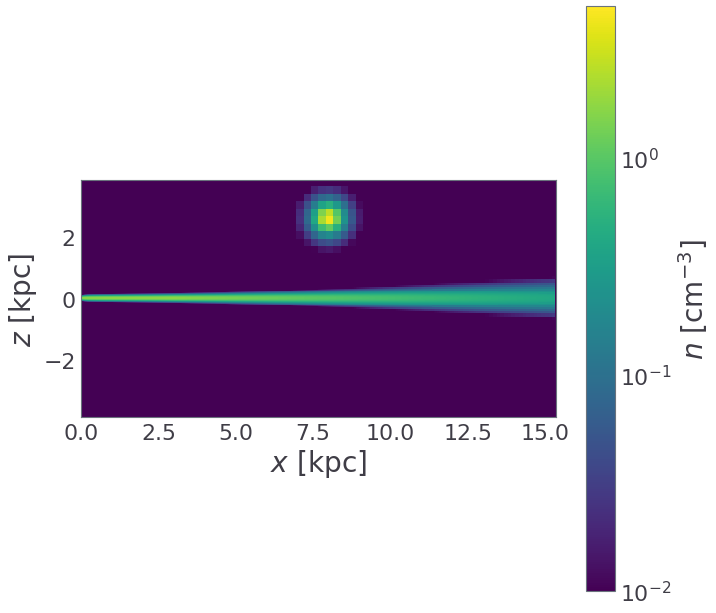

In [4]:
fig = plt.figure(figsize=(10,12))

plt.subplot(111)
mt.imshow(op1.dd[:,op1.ny/2,:],zlims=(1e-2,5),extentto=(op1.x_min,op1.x_max,op1.z_min,op1.z_max),logscale=True,fig=fig)
plt.xlabel(r"$x$ [kpc]",fontsize=28)
plt.ylabel(r"$z$ [kpc]",fontsize=28)
plt.locator_params(nbins=7)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
cbar = plt.colorbar(shrink=.7)
ax = plt.gca()
cbar.ax.tick_params(labelsize=22)
cbar.set_label(r'$n$ [cm$^{-3}$]',fontsize=28)
plt.tight_layout()
plt.show()
#plt.savefig("/fs/nas14/other0/cbenitez/phasespace_t_%02i.pdf" %(ft-12), format='pdf')
#plt.close()